# TUTORIEL REGRESSION PENALISEE RIDGE

## LES DONNEES
 

In [2]:
import pandas as pd
import os
from sklearn import datasets

iris = pd.DataFrame(datasets.load_iris()["data"])

# on définit les colonnes
iris.columns = ['petalLength', 'petalWidth', 'sepalLength', 'sepalWidth']
# et la target
iris['species'] = datasets.load_iris()["target"]
iris['species'] = iris['species'].map({0 : 'Iris-setosa', 1 : 'Iris-versicolor', 2 : 'Iris-virginica'})
iris.head()

,petalLength,petalWidth,sepalLength,sepalWidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EXPLORATION


<AxesSubplot:>

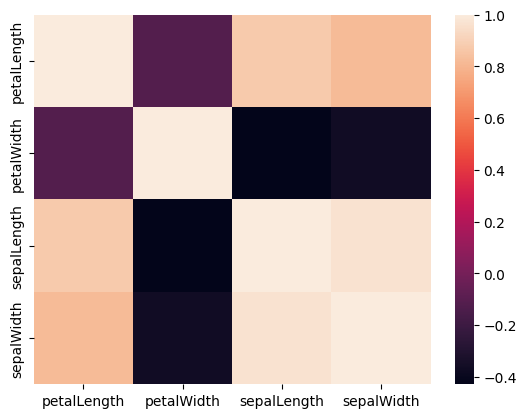

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
corr = iris.corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


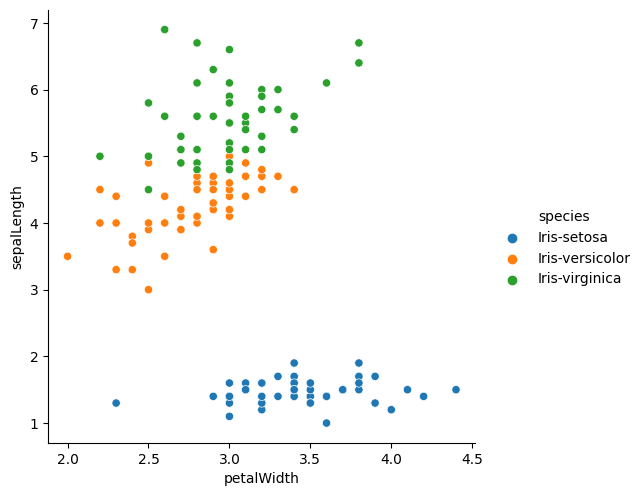

In [4]:

# étude de sepalLength
sns.pairplot(x_vars='petalWidth', y_vars='sepalLength', data=iris, hue="species", size=5)

# on va séparer en deux groupes et étudier que les non setosa

X = iris.loc[iris.species != 'Iris-setosa',['petalLength', 'petalWidth', 'sepalWidth']]
y = iris[iris.species != 'Iris-setosa'].sepalLength

## REGRESSION LINEAIRE SIMPLE


In [35]:
# Régression linéaire simple
# quel est le signe de petal.width pour expliquer sepalLength
from sklearn import linear_model
reg = linear_model.LinearRegression()


X_petalWidth=X[['petalWidth']]
reg.fit(X_petalWidth,y)
sepalLength_pred =reg.predict(X_petalWidth)


In [36]:
print(pd.DataFrame({'Coefficients': list(reg.coef_)}, list(X_petalWidth.columns.values)))


            Coefficients
petalWidth      1.289666


#### Focus sur les métriques de régression

- **MSE** *(Mean Square Error)*  =  $1/n\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

- **RMSE** *(Root Mean Square Error)*   =  $\sqrt{MSE}$

- **MAE** *(Mean Absolute Error)* = $1/n\sum_{i=1}^{n}\mid(y_i - \hat{y}_i)\mid$

- **MAPE** *(Mean Absolute Percentage Error)*  = $1/n\sum_{i=1}^{n}\mid\frac{(y_i - \hat{y}_i)}{y_i}\mid$

- **R$^2$ (ou Coefficient de Pearson)** =  $1 -\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y}_i)^2}$ 


In [37]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

print('Coefficients: \n', reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y, sepalLength_pred))
print("root Mean squared error: %.2f" % sqrt(mean_squared_error(y, sepalLength_pred)))
print("Mean Absolute Error : %.2f" % mean_absolute_error(y, sepalLength_pred))
print("Mean Absolute Percentage Error : %.2f" % mean_absolute_percentage_error(y, sepalLength_pred))
print('Variance score: %.2f' % r2_score(y, sepalLength_pred))



Coefficients: 
 [1.28966574]
Mean squared error: 0.49
root Mean squared error: 0.70
Mean Absolute Error : 0.57
Mean Absolute Percentage Error : 0.12
Variance score: 0.27


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

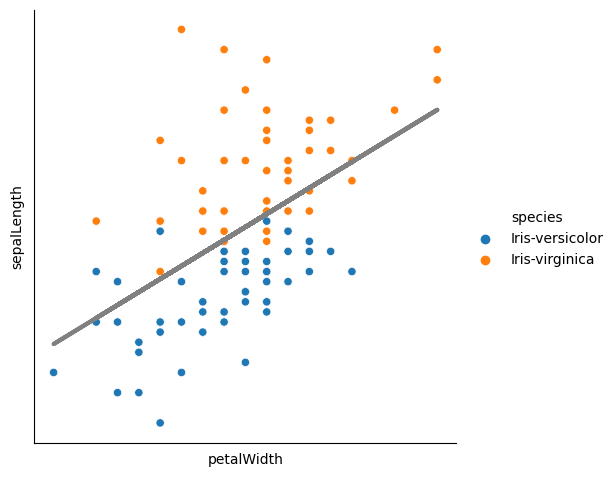

In [38]:
import matplotlib.pyplot as plt
plt.figure()
sns.pairplot(x_vars='petalWidth', y_vars='sepalLength', data=iris[iris.species != 'Iris-setosa'], hue="species", size=5)
plt.plot(X_petalWidth, sepalLength_pred, color='grey', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

## REGRESSION MULTIPLE SUR DES DONNEES CORRELEES

In [39]:
# rég linéaire multiple sur données corrélées
reg = linear_model.LinearRegression()
reg.fit(X,y)
print(pd.DataFrame({'Coefficients': list(reg.coef_)}, list(X.columns.values)))

#  quand on explique la variation de Y par les 3 var, le signe de Petal.Width devient neg ! -0.25
# CONCLUSION : la rég linéaire donne des résultats biaisés en présence de COLLINEARITE (corrélations multivariées)

             Coefficients
petalLength      0.695178
petalWidth      -0.247895
sepalWidth       1.066154


In [40]:
print('Variance score: %.2f' % r2_score(y, reg.predict(X)))

Variance score: 0.86


In [41]:
# Si on enleve une variable
reg = linear_model.LinearRegression()
reg.fit(X[["sepalWidth","petalLength"]],y)
print(pd.DataFrame({'Coefficients': list(reg.coef_)}, list(X[["sepalWidth","petalLength"]].columns.values)))

print('Variance score: %.2f' % r2_score(y, reg.predict(X[["sepalWidth","petalLength"]])))

             Coefficients
sepalWidth       0.994963
petalLength      0.653339
Variance score: 0.86


## REGRESSION LINEAIRE MULTIPLE RIDGE SUR DES DONNEES CORRELEES

In [48]:
# la régression ridge permet de garder tous les prédicteurs en evitant que les coeff
# prennent des valeurs contradictoires pour compenser les corrélations
from sklearn import linear_model
ridge = linear_model.LinearRegression()
ridge.fit(X,y)
print(pd.DataFrame({'Coefficients': list(ridge.coef_)}, list(X.columns.values)))

             Coefficients
petalLength      0.695178
petalWidth      -0.247895
sepalWidth       1.066154


In [49]:
# On augmente le coefficient pour augmenter la pénalisation et voir son impact (schrinkage)
from sklearn import linear_model
ridge = linear_model.Ridge (alpha = 25)
ridge.fit(X,y)
print(pd.DataFrame({'Coefficients': list(ridge.coef_)}, list(X.columns.values)))

             Coefficients
petalLength      0.527753
petalWidth       0.118419
sepalWidth       0.441238


In [50]:
# On augmente le coefficient pour augmenter la pénalisation et voir son impact (schrinkage)
from sklearn import linear_model
ridge = linear_model.Ridge (alpha = 500)
ridge.fit(X,y)
print(pd.DataFrame({'Coefficients': list(ridge.coef_)}, list(X.columns.values)))

             Coefficients
petalLength      0.080436
petalWidth       0.024953
sepalWidth       0.052245


# REGRESSION LINEAIRE MULTIPLE LASSO SUR DES DONNEES CORRELEES

In [56]:
# On augmente le coefficient pour augmenter la pénalisation et voir son impact (schrinkage)
from sklearn import linear_model
ridge = linear_model.Lasso(alpha = 0.1)
ridge.fit(X,y)
print(pd.DataFrame({'Coefficients': list(ridge.coef_)}, list(X.columns.values)))

             Coefficients
petalLength      0.627242
petalWidth       0.000000
sepalWidth       0.459306
